In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

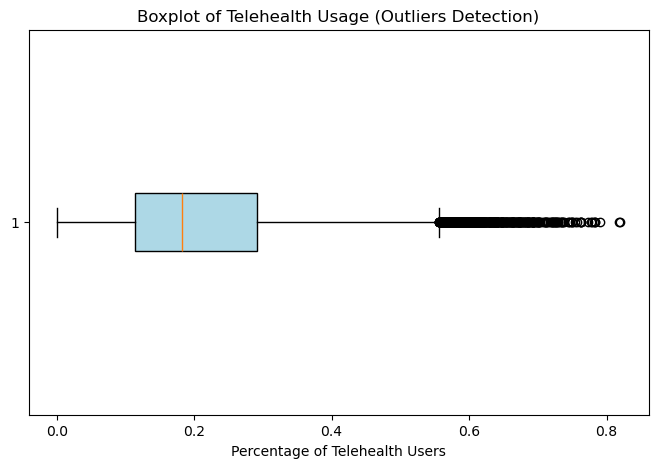

In [2]:
medicare_cleaned = pd.read_csv("./data/medicare_cleaned.csv")
plt.figure(figsize=(8, 5))
plt.boxplot(medicare_cleaned["Pct_Telehealth"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel("Percentage of Telehealth Users")
plt.title("Boxplot of Telehealth Usage (Outliers Detection)")
plt.show()

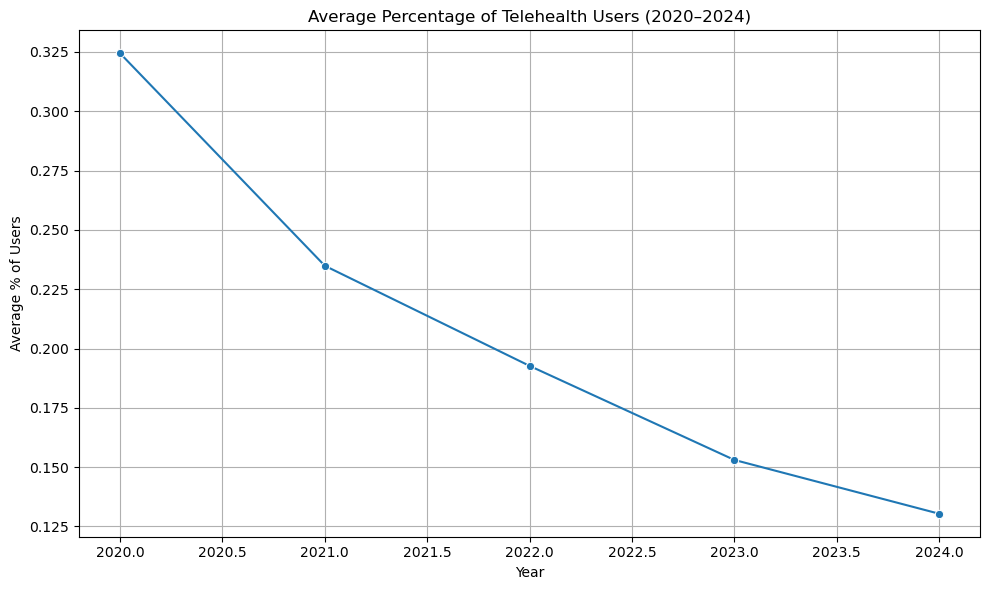

In [3]:
avg_percent_by_year = medicare_cleaned.groupby('Year')['Pct_Telehealth'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_percent_by_year, x='Year', y='Pct_Telehealth', marker='o')
plt.title('Average Percentage of Telehealth Users (2020–2024)')
plt.ylabel('Average % of Users')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()